# Prediction the percentage of an student based on the no. of study hours.
  In this notebook, we're going to go through an example machine learning project with the goal of predicting the percentage     of an student based on the no. of study hours.
  
  To work through these topics, we'll use pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn for machine   learning and modelling tasks.


## 1. Problem Defination
How well we predict the percentage of an student get based on the number of study hours.

## 2. Data
Taking the data from (https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv)

## 3. Evaluation
To see how well our model is doing, we'll calculate the RMSLE. As with my Regression evaluation RMSLE value should be as low as possible. 

## 4. Features
First, we'll import the dataset and start exploring. Since we know the evaluation metric we're trying to minimise, our first goal will be building a baseline model and seeing how it stacks up against the competition.

### Importing the data 

In [3]:
# Import data analysis tools 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline             # For see plots in the notebook
import seaborn as sns

UsageError: unrecognized arguments: # For see plots in the notebook


Now we've got our tools for data analysis ready, we can import the data and start to explore it.
.

In [4]:
# Import the data and save it to df
df = pd.read_csv("StudentsScore.csv")


In [5]:
# Information about Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Let's do some EDA(Exploratory Data Analysis)

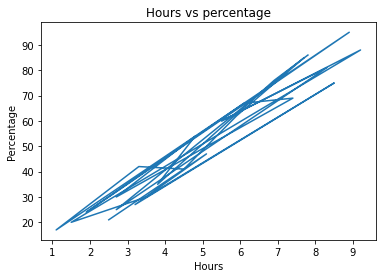

In [8]:
# Create empty figure with axis
fig, axes = plt.subplots()

# Now use the axes object to add stuff to plot
axes.plot(df['Hours'], df['Scores'])
axes.set_xlabel('Hours')
axes.set_ylabel('Percentage')
axes.set_title('Hours vs percentage');

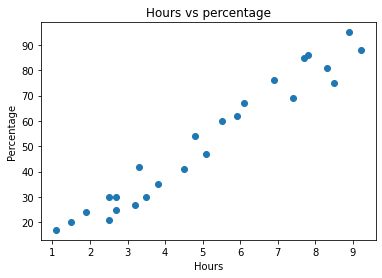

In [9]:
# Create empty figure with axis
fig, axes = plt.subplots()

# Now use the axes object to add stuff to plot
axes.scatter(df['Hours'], df['Scores'])
axes.set_xlabel('Hours')
axes.set_ylabel('Percentage')
axes.set_title('Hours vs percentage');

### Preparing the data for modelling
Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on,in this case only one feature that is Hours, and a y array with the target variable, in this case the Scores column.

In [10]:
feature = df['Hours']
lables = df['Scores']

In [11]:
type(feature)

pandas.core.series.Series

In [12]:
# Convert into DataFrame
X = pd.DataFrame(feature)
y = pd.DataFrame(lables)

In [13]:
type(X)

pandas.core.frame.DataFrame

### Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [14]:
# Import train_test_split
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Creating and Training the model

In [16]:
# Import Linear Regression
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(X_train,y_train)

LinearRegression()

### Model Evaluation
Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [19]:
# print the intercept
intercept_df = lr.intercept_
intercept_df

array([2.37081538])

In [20]:
coeff_df = lr.coef_
coeff_df

array([[9.78856669]])

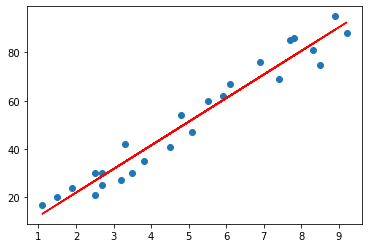

In [21]:
# Plotting the regression line
line = coeff_df*X+intercept_df

fig,axes = plt.subplots()

# Plotting for the test data
axes.plot(X,line,'r')
axes.scatter(X, y)


### Prediction the model
Let's grab predictions off our test set and see how well it did!

In [22]:
predictions = lr.predict(X_test)

Text(0.5, 1.0, 'Predicted vs Actual')

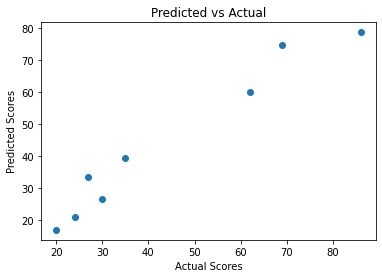

In [28]:
# Compare between predicted and actual values
fig,ax =plt.subplots()
ax.scatter(y_test,predictions)
ax.set_xlabel('Actual Scores')
ax.set_ylabel('Predicted Scores')
ax.set_title('Predicted vs Actual')


In [24]:
# You can also test with your own data(9.25hrs./day)
hours =[9.25]
hour = pd.DataFrame(hours)
own_pred = lr.predict(hour)
own_pred

array([[92.91505723]])

### Evaluation of our model

MAE is the easiest to understand, because it's the average error.

MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.

RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are loss functions, because we want to minimize them.


In [25]:
from sklearn import metrics

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.419727808027652
MSE: 22.96509721270043
RMSE: 4.792191274636315


   # Thank you